In [1]:
# scrollable plots
%matplotlib notebook

# # simple plots
# %matplotlib inline

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import importlib

try:
    importlib.reload(mtools)
except NameError:
    import mixing_tools as mtools

## Testing unit functions

In [24]:
# create samples for testing out import functions

def create_sample_int16():
    x = np.arange(1,10+1, dtype=np.int16)
    x.tofile('test-int16.bin')
create_sample_int16()

def create_sample_float64():
    x = np.arange(11,20+1, dtype=np.float64)
    x.tofile('test-float64.bin')
create_sample_float64()

In [16]:
# testing out frequency <-> FFT index functions

# sample 1: basic operation with even sized FFTs
fs = 32
ts = 1/fs
n = 16
f1 = np.fft.fftfreq(n, d=ts)
print("ind, f1:", *[(x,f) for x,f in enumerate(f1)], sep='\n')

print("fpos {}: floor index {}, {}".format(7.0, *mtools.fpos2indFloor(7.0, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(7.0, *mtools.fpos2indCeil(7.0, n, ts, fout=True)))

print("fpos {}: floor index {}, {}".format(8.1, *mtools.fpos2indFloor(8.1, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(8.1, *mtools.fpos2indCeil(8.1, n, ts, fout=True)))

print("fpos {}: floor index {}, {}".format(-7.0, *mtools.fneg2indFloor(-7.0, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(-7.0, *mtools.fneg2indCeil(-7.0, n, ts, fout=True)))

print("fpos {}: floor index {}, {}".format(-8.0, *mtools.fneg2indFloor(-8.0, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(-8.0, *mtools.fneg2indCeil(-8.0, n, ts, fout=True)))
print()

# sample 2: test out working with FFTs with odd number of elements
fs = 27
ts = 1/fs
n = 15
f1 = np.fft.fftfreq(n, d=ts)
print("ind, f1:", *[(x,f) for x,f in enumerate(f1)], sep='\n')

print("fpos {}: floor index {}, {}".format(7.0, *mtools.fpos2indFloor(7.0, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(7.0, *mtools.fpos2indCeil(7.0, n, ts, fout=True)))

print("fpos {}: floor index {}, {}".format(8.1, *mtools.fpos2indFloor(8.1, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(8.1, *mtools.fpos2indCeil(8.1, n, ts, fout=True)))

print("fpos {}: floor index {}, {}".format(-7.0, *mtools.fneg2indFloor(-7.0, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(-7.0, *mtools.fneg2indCeil(-7.0, n, ts, fout=True)))

print("fpos {}: floor index {}, {}".format(-8.0, *mtools.fneg2indFloor(-8.0, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(-8.0, *mtools.fneg2indCeil(-8.0, n, ts, fout=True)))
print()

# sample 3: test out center frequency offset
fs = 32
ts = 1/fs
n = 16
fc = 31
f1 = np.fft.fftfreq(n, d=ts)
f1[0:8] = f1[0:8] + fc
f1[8:] = f1[8:] - fc
print("ind, f1:", *[(x,f) for x,f in enumerate(f1)], sep='\n')

print("fpos {}: floor index {}, {}".format(7.0, *mtools.fpos2indFloor(7.0 + fc, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(7.0, *mtools.fpos2indCeil(7.0 + fc, n, ts, fout=True)))

print("fpos {}: floor index {}, {}".format(8.1, *mtools.fpos2indFloor(8.1 + fc, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(8.1, *mtools.fpos2indCeil(8.1 + fc, n, ts, fout=True)))

print("fpos {}: floor index {}, {}".format(-7.0, *mtools.fneg2indFloor(-7.0 -fc, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(-7.0, *mtools.fneg2indCeil(-7.0 - fc, n, ts, fout=True)))

print("fpos {}: floor index {}, {}".format(-8.0, *mtools.fneg2indFloor(-8.0 - fc, n, ts, fout=True)))
print("fpos {}: ceil index {}, {}".format(-8.0, *mtools.fneg2indCeil(-8.0 - fc, n, ts, fout=True)))

ind, f1:
(0, 0.0)
(1, 2.0)
(2, 4.0)
(3, 6.0)
(4, 8.0)
(5, 10.0)
(6, 12.0)
(7, 14.0)
(8, -16.0)
(9, -14.0)
(10, -12.0)
(11, -10.0)
(12, -8.0)
(13, -6.0)
(14, -4.0)
(15, -2.0)
fpos 7.0: floor index 3, 6.0
fpos 7.0: ceil index 4, 8.0
fpos 8.1: floor index 4, 8.0
fpos 8.1: ceil index 5, 10.0
fpos -7.0: floor index 12, -8.0
fpos -7.0: ceil index 13, -6.0
fpos -8.0: floor index 12, -8.0
fpos -8.0: ceil index 12, -8.0

ind, f1:
(0, 0.0)
(1, 1.7999999999999998)
(2, 3.5999999999999996)
(3, 5.3999999999999995)
(4, 7.199999999999999)
(5, 9.0)
(6, 10.799999999999999)
(7, 12.599999999999998)
(8, -12.599999999999998)
(9, -10.799999999999999)
(10, -9.0)
(11, -7.199999999999999)
(12, -5.3999999999999995)
(13, -3.5999999999999996)
(14, -1.7999999999999998)
fpos 7.0: floor index 3, 5.4
fpos 7.0: ceil index 4, 7.2
fpos 8.1: floor index 4, 7.2
fpos 8.1: ceil index 5, 9.0
fpos -7.0: floor index 11, -7.2
fpos -7.0: ceil index 12, -5.4
fpos -8.0: floor index 10, -9.0
fpos -8.0: ceil index 11, -7.2

ind, f1:


In [15]:
# sample 1: basic operation with even sized FFTs
fs = 32
ts = 1/fs
n = 16
f1 = np.fft.fftfreq(n, d=ts)
print("ind, f1:", *[(x,f) for x,f in enumerate(f1)], sep='\n')
fftShifted = mtools.fft_basebandShift(f1, 2, 5)
print("size:", fftShifted.size)
print(fftShifted)
print()

# sample 2: off sized series
fs = 27
ts = 1/fs
n = 15
f1 = np.fft.fftfreq(n, d=ts)
print("ind, f1:", *[(x,f) for x,f in enumerate(f1)], sep='\n')
fftShifted = mtools.fft_basebandShift(f1, 0, 2)
print("size:", fftShifted.size)
print(fftShifted)
print()

ind, f1:
(0, 0.0)
(1, 2.0)
(2, 4.0)
(3, 6.0)
(4, 8.0)
(5, 10.0)
(6, 12.0)
(7, 14.0)
(8, -16.0)
(9, -14.0)
(10, -12.0)
(11, -10.0)
(12, -8.0)
(13, -6.0)
(14, -4.0)
(15, -2.0)
size: 6
[  4.   6.   8. -10.  -8.  -6.]

ind, f1:
(0, 0.0)
(1, 1.7999999999999998)
(2, 3.5999999999999996)
(3, 5.3999999999999995)
(4, 7.199999999999999)
(5, 9.0)
(6, 10.799999999999999)
(7, 12.599999999999998)
(8, -12.599999999999998)
(9, -10.799999999999999)
(10, -9.0)
(11, -7.199999999999999)
(12, -5.3999999999999995)
(13, -3.5999999999999996)
(14, -1.7999999999999998)
size: 4
[ 0.   1.8 -3.6 -1.8]



size: 66
freq of 0th bin: 10.49901768172888
new sampling time: 0.24100378787878787


<IPython.core.display.Javascript object>


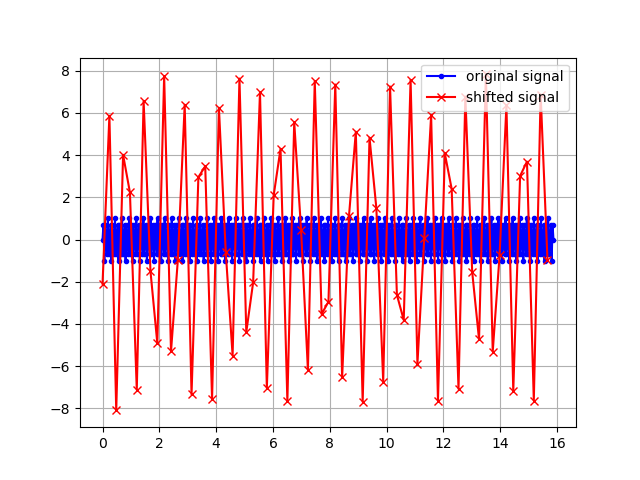

<IPython.core.display.Javascript object>


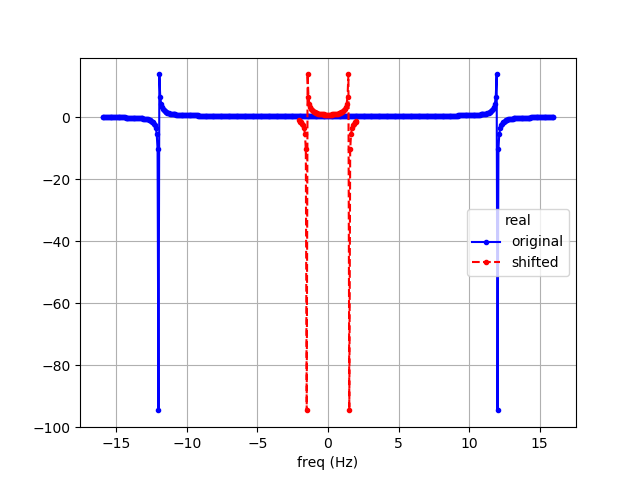

<IPython.core.display.Javascript object>


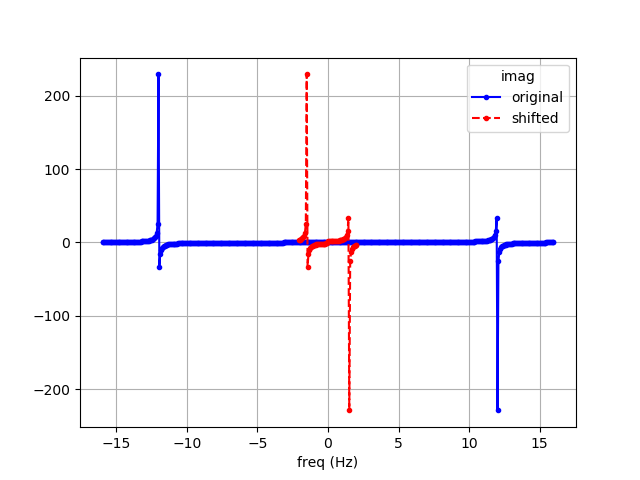

In [25]:
# sample case: create a signal with off-center sine wave. pull it down to baseband and check if the frequencies still make sense
fs = 32
ts = 1/fs
n = 509
t = np.arange(n)*ts # time series

# construct signal: simple sine wave
fSig = 12
w = 2*np.pi*fSig
x = np.sin(w*t)

xShifted, f0, TsShifted = mtools.basebandShift(x, ts, bwSignal=2, fcSignal=10.5, fcData=0)

nShifted = xShifted.size
tShifted = np.arange(nShifted)*TsShifted

print("size:", nShifted)
print("freq of 0th bin:", f0)
print("new sampling time:", TsShifted)

# plot time domain
plt.figure()
plt.plot(t, x, 'b.-', label="original signal")
plt.plot(tShifted, xShifted, 'r-x', label="shifted signal")
plt.legend()
plt.grid()


# plot frequency domain
xf = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(n, ts))
xfShifted = np.fft.fftshift(np.fft.fft(xShifted))
fShifted = np.fft.fftshift(np.fft.fftfreq(nShifted, TsShifted))

plt.figure()
plt.plot(f, xf.real, 'b.-', label="original")
plt.plot(fShifted, xfShifted.real, 'r.--', label="shifted")
plt.legend(title="real")
plt.grid()
plt.xlabel("freq (Hz)")

plt.figure()
plt.plot(f, xf.imag, 'b.-', label="original")
plt.plot(fShifted, xfShifted.imag, 'r.--', label="shifted")
plt.legend(title="imag")
plt.grid()
plt.xlabel("freq (Hz)")


plt.show()

In [26]:
fs = 32
Ts = 1/fs
n = 32

def fc_fftfreq(n, Ts, fc):
    pmax = int(np.floor((n-1)/2))
    print("pmax:", pmax)
    freq = np.fft.fftfreq(n, Ts)
    freq = freq + fc
    return freq

f = np.fft.fftfreq(n, Ts)
fShifted = fc_fftfreq(n, Ts, 10)
print(f)
print(fShifted)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.
  -4.  -3.  -2.  -1.]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. -6. -5.
 -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
